Model trained on largeSimpleBoolean5.
Score on largeSimpleBoolean5:
```
python -m encoders.evaluation.knnstats rnnsupervisedencoder-largeSimpleBoolean5.pkl expressions-synthetic/split/largeSimpleBoolean5-testset.json.gz expressions-synthetic/largeSimpleBoolean5.json.gz 
Avg Semantically Equivalent NNs: [1.         0.99954338 0.99908676 0.90251142 0.89949772 0.89604262
   0.89391172 0.8906583  0.88751903 0.88436834 0.88145842 0.85585997
   0.85308805 0.8500598  0.84682648]
```
Evaluation on a generated dataset, #vars=7, operators &|~, expression size=7.
Score unknown (out of memory when trying to evaluate)

In [1]:
import numpy
import pandas
from matplotlib import pyplot

from data.dataimport import import_data
import data.tree
from encoders.baseencoder import AbstractEncoder
from data.tree import Node

In [2]:
ENCODER_PKL = "../rnnsupervisedencoder-largeSimpleBoolean5.pkl"
VALIDATION_DATA = "../simple-bool-7-vars-size-7.json.gz"
DATA = VALIDATION_DATA

In [3]:
encoder = AbstractEncoder.load(ENCODER_PKL)

In [4]:
data = import_data(DATA)

In [5]:
def flatten_data(data):
    flat = []
    for key, class_ in data.items():
        for item in [class_['original']] + class_['noise']:
            flat.append({
                'eq_class': key,
                'expression': item
            })
    return flat
    
flat = flatten_data(data)

In [6]:
def set_encoding(encoder, flat):
    for item in flat:
        item['encoding'] = encoder.get_encoding(item['expression'])

set_encoding(encoder, flat)

Compiling Methods...
Compilation Finished...


In [7]:
def get_false():
    literal = "a"
    false = Node("Start", ("child",), "False")
    and_ = Node("And", ("left", "right"), "False", parent=false)
    false.set_children_for_property("child", [and_])
    literal_node = Node(literal, (), literal, parent=and_)
    and_.set_children_for_property("right", [literal_node])
    not_literal_node = Node("Not", ("child",), "Not({})".format(literal), parent=and_)
    literal_node_2 = Node(literal, (), literal, parent=not_literal_node)
    not_literal_node.set_children_for_property("child", [literal_node_2])
    and_.set_children_for_property("left", [not_literal_node])
    return list('(~{})&{}'.format(literal, literal)), false


print(get_false()[0])
print(str(get_false()[1]))

['(', '~', 'a', ')', '&', 'a']
-Start (False)
| \+child
|   \-And (False)
|     |+left
|     | \-Not (Not(a))
|     |   \+child
|     |     \-a (a)
|     \+right
|       \-a (a)



In [8]:
false_encoding = encoder.get_encoding(get_false())
false_encoding

array([-0.05260513, -0.00044746,  0.04525001, -0.06157264, -0.00188046,
        0.36537558,  0.09976053,  0.05204848, -0.23780778,  0.08532621,
       -0.0228723 , -0.02241857, -0.04955533, -0.01390181,  0.00938051,
        0.03112916, -0.19621707, -0.29946646,  0.02736039,  0.06212078,
        0.2329437 ,  0.06782116, -0.09762092,  0.0086074 , -0.05211248,
        0.02665711,  0.06885847,  0.01408929, -0.0252952 ,  0.05633501,
       -0.11335017, -0.02359352,  0.01245142, -0.03537644, -0.04661969,
        0.04746287, -0.19517879,  0.00144276, -0.17191605, -0.08180853,
        0.12777746, -0.0216901 ,  0.06097023, -0.07738505,  0.05765972,
       -0.09061714,  0.04844485, -0.08126201,  0.0794521 , -0.17091013,
       -0.00827959, -0.01486147, -0.00117874,  0.0524045 , -0.07889993,
        0.2792431 , -0.04980036, -0.15386842, -0.40302074, -0.09696799,
       -0.00703054, -0.31308216,  0.03352482,  0.05213499], dtype=float32)

In [9]:
def set_dist_to_false(false_encoding, flat):
    def dist(x,y):   
        return numpy.sqrt(numpy.sum((x-y)**2))
    
    for item in flat:
        item['dist'] = dist(item['encoding'], false_encoding)
set_dist_to_false(false_encoding, flat)

In [10]:
def make_table(flat):
    return [{'eq_class': item['eq_class'],
             'expression': item['expression'][0],
             'dist': item['dist']} for item in flat]
table = make_table(flat)

In [11]:
pandas.set_option('max_rows', 100)
df = pandas.DataFrame(table)
df

,dist,eq_class,expression
0,0.810685,(e & ~c) | (~a & ~c),"[(, e, |, (, ~, a, ), ), &, (, ~, c, )]"
1,0.838604,(e & ~c) | (~a & ~c),"[(, (, ~, a, ), |, e, ), &, (, ~, c, )]"
2,0.849795,(e & ~c) | (~a & ~c),"[(, ~, c, ), &, (, e, |, (, ~, a, ), )]"
3,0.876467,(e & ~c) | (~a & ~c),"[(, ~, c, ), &, (, (, ~, a, ), |, e, )]"
4,0.957027,(e & ~c) | (~a & ~c),"[~, (, c, |, (, a, &, (, ~, e, ), ), )]"
5,0.951432,(e & ~c) | (~a & ~c),"[~, (, c, |, (, (, ~, e, ), &, a, ), )]"
6,0.975622,(e & ~c) | (~a & ~c),"[~, (, (, a, &, (, ~, e, ), ), |, c, )]"
7,0.968322,(e & ~c) | (~a & ~c),"[~, (, (, (, ~, e, ), &, a, ), |, c, )]"
8,1.101841,c | (a & d) | (a & f),"[c, |, (, a, &, (, d, |, f, ), )]"
9,1.102957,c | (a & d) | (a & f),"[c, |, (, a, &, (, f, |, d, ), )]"


In [12]:
pandas.set_option('max_rows', 500)
df = pandas.DataFrame(table)
df[df.eq_class == 'False']

,dist,eq_class,expression
119726,0.957570,False,"[(, (, ~, c, ), &, c, ), &, f]"
119727,0.681269,False,"[(, ~, a, ), &, (, a, &, d, )]"
119728,1.033491,False,"[~, (, (, e, |, (, ~, g, ), ), |, g, )]"
119729,1.225164,False,"[~, (, g, |, (, ~, (, g, &, d, ), ), )]"
119730,1.350158,False,"[(, ~, (, (, ~, g, ), |, d, ), ), &, d]"
119731,1.155089,False,"[~, (, g, |, (, (, ~, g, ), |, c, ), )]"
119732,0.970186,False,"[(, ~, a, ), &, (, (, ~, e, ), &, e, )]"
119733,0.372925,False,"[a, &, (, e, &, (, ~, a, ), )]"
119734,0.683401,False,"[(, a, &, d, ), &, (, ~, a, )]"
119735,0.462294,False,"[a, &, (, f, &, (, ~, a, ), )]"


In [13]:
@numpy.vectorize
def bucketise(num):
    BUCKET_NUM = 20
    return numpy.floor(num / 2 * BUCKET_NUM)

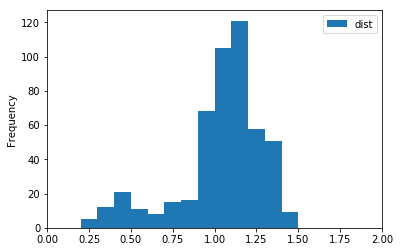

In [14]:
df[df.eq_class == 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))

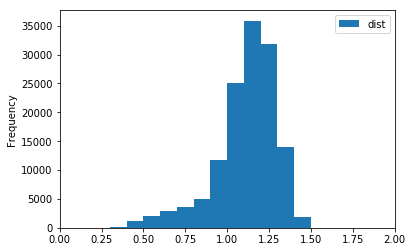

In [15]:
df[df.eq_class != 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))

Conclusions: the difference is significant, but small. Maybe the model doesn't generalise well on the dataset with larger tree size (5 versus 7). Next step: try this out with dataset with tree size 5.